<a href="https://colab.research.google.com/github/magn2998/XraySegmentation/blob/main/Project28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Some Requriements:
! pip install gdown torch torchvision matplotlib
! pip install imutils
import os
import gdown
import useModelBatch
import useModel
import plotExperiment

use_cpu = False # Write False if the GPU should be used


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\ezpth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\ezpth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# **Project 28: Segmentation of X-ray images**

In this notebook, we will briefly cover the scripts used throughout the project in order to get the results shown in the paper on this project. We will show examples of how the results were generated, how the plots were made, and so on. The notebook will include python functions defined in external files that are also within the same Git repository as this Jupyter file. The experiments will not be covered detailed, as they are covered in the related paper.

## **Experiment 1**
For the first experiment, we simply trained the model on the entire dataset, with varying sizes of images. 
We will begin by downloading the model trained on 128x128 pixel images. Download it by running the code below:


In [2]:

def download_model(id, destination_folder, filename):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    destination_path = os.path.join(destination_folder, filename)
    gdown.download(id=id, output=destination_path, quiet=False)
    print(f"Downloaded model saved to {destination_path}")

download_model('1EotaxK6m8jHnJw0V5I6y0ZMC-O2uFzSk', 'models', 'model_trained_128x128.pt')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1EotaxK6m8jHnJw0V5I6y0ZMC-O2uFzSk
From (redirected): https://drive.google.com/uc?id=1EotaxK6m8jHnJw0V5I6y0ZMC-O2uFzSk&confirm=t&uuid=9d8634c2-ab37-46eb-9015-b4c565681bae
To: d:\DTU\MSc\DeepLearning\Project\XraySegmentation\models\model_trained_128x128.pt
100%|██████████| 124M/124M [00:01<00:00, 62.6MB/s] 


Downloaded model saved to models\model_trained_128x128.pt


Next, we will simply try to run this model on a batch of 5 from the validation set. It will always use the same batch. We choose to do this, as it would be easier to compare different results.
The image below is the same seen in the paper, in figure 5. Note that the accuracy and loss is also stated. This was also how the different values for accuracy and loss was determed, which is used in the later graphs.

Testing model: models/model_trained_128x128.pt on image size 128
Device Used: cpu
val: cce: 0.022004, dice: 0.017063, loss: 0.019534, pixelAcc: 0.957963


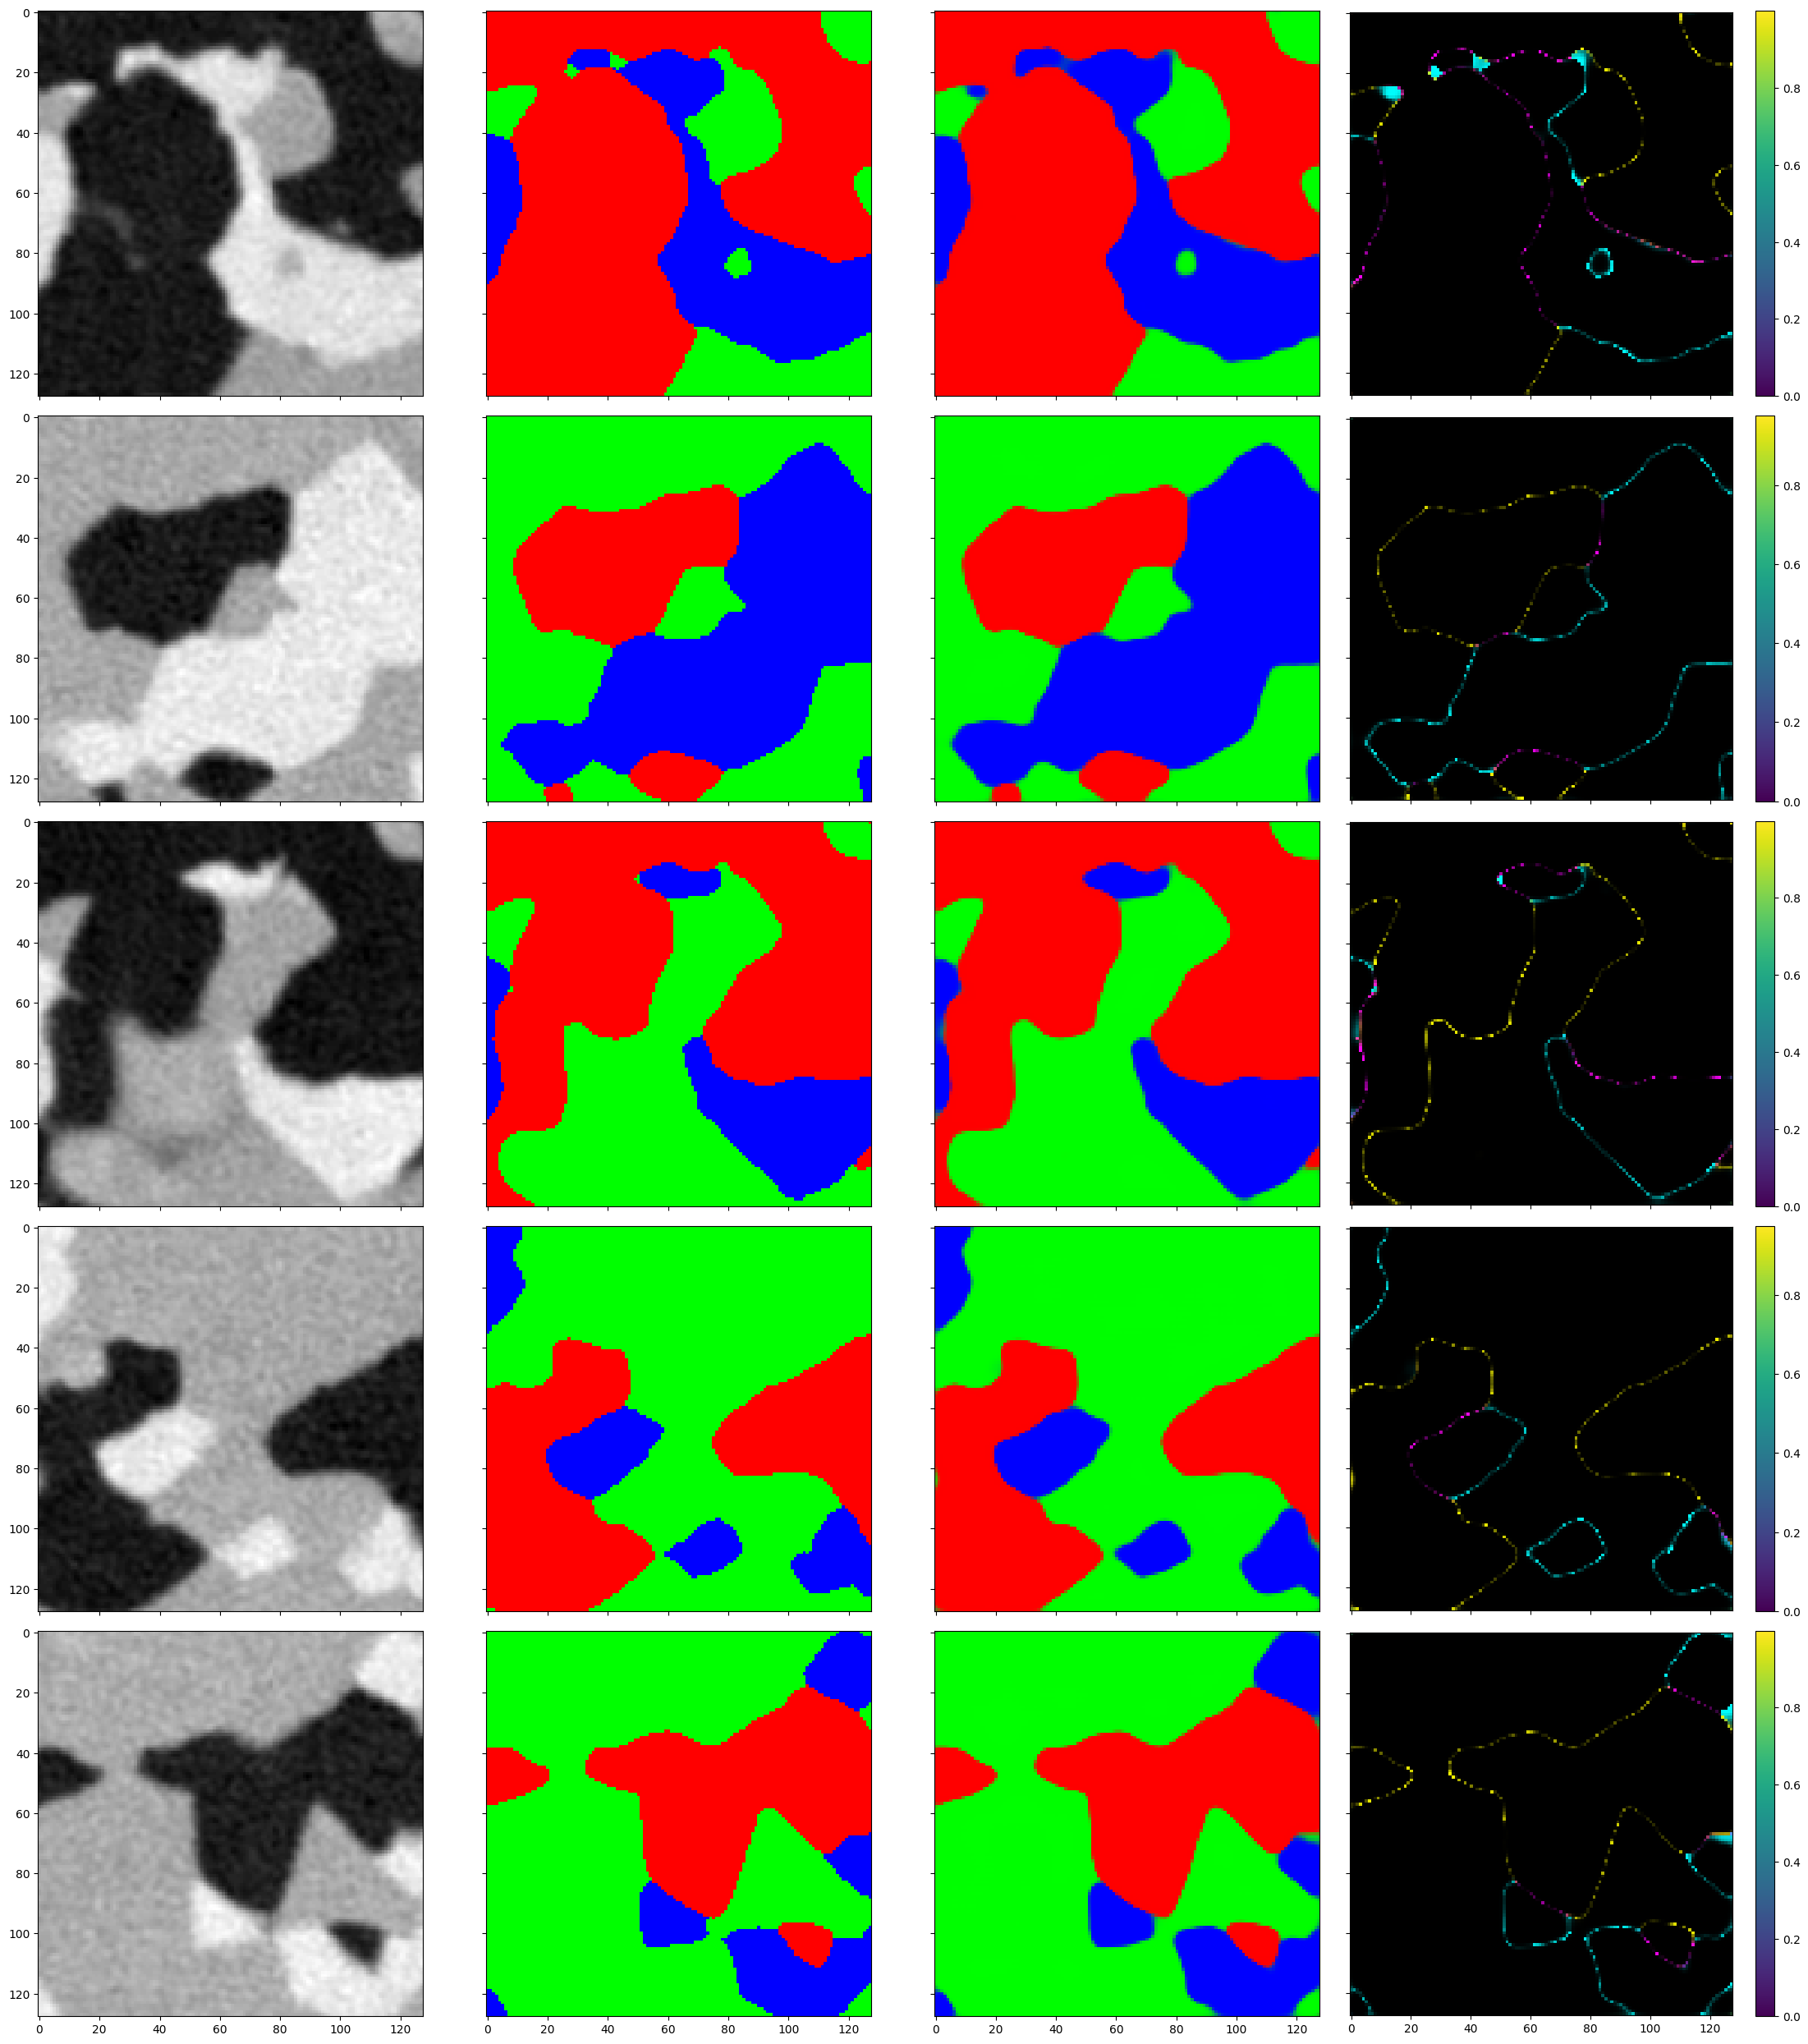

In [5]:
useModelBatch.Use_Model_On_Batch_Of_Validation_Set(128, "models/model_trained_128x128.pt", False, True)

If you want to use the model on a specific image (Image between 1-500) and see the result do:

Device Used: cpu
torch.Size([1, 1, 128, 128])
(1, 3, 128, 128)
val: 


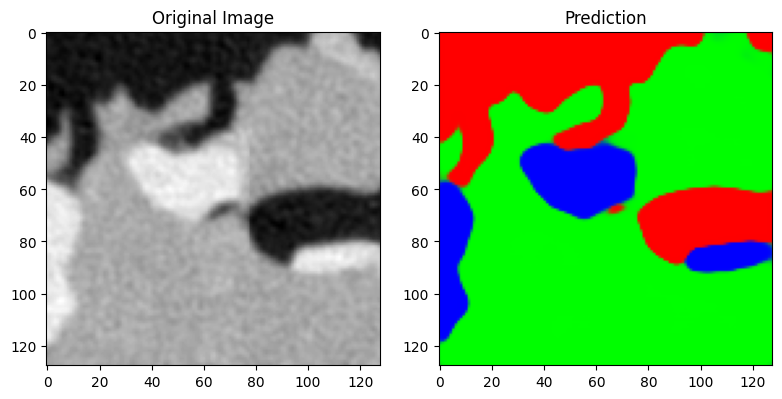

In [6]:
useModel.Use_Model_On_Specific_Image("420", 128, "models/model_trained_128x128.pt", False, True)

## **Creating Graphs**
In experiment 1, 2 and 3, graphs were used to that were created in python.
The code to create these plots exists in __plotExperiment.py__, which will be used here.
The script needs the data to plot, which should be given manually. 

## **Experiment 1**
The data for experiment 1 can be found in the text file ./result/Part1/overallResults/output.txt
As an example, we will plot the validation accuracies below.
To recreate the data seen in figure 4(A) from the paper do, set the following values and run the function __plotExperiment.Simple_Graph_Create__.




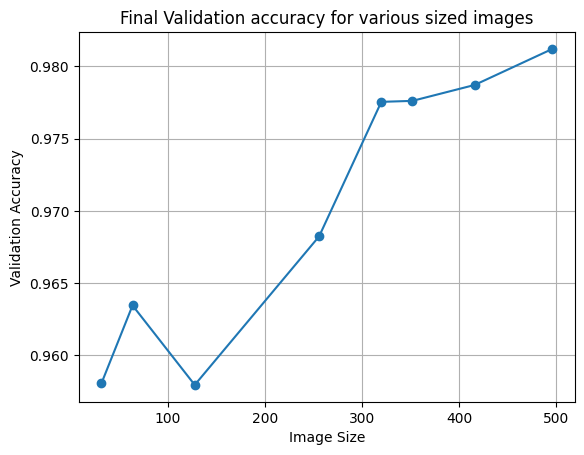

<Figure size 640x480 with 0 Axes>

In [7]:
img_size = [32, 64, 128, 256, 320, 352, 416, 496] 
accuracies = [0.958073, 0.963460, 0.957963, 0.968236, 0.977537, 0.977605, 0.978704, 0.981197] 
title = 'Final Validation accuracy for various sized images' 
x_label = 'Image Size' 
y_label = 'Validation Accuracy' 
plotExperiment.Simple_Graph_Create(img_size, accuracies, title, x_label, y_label, False)

In the same previously mentioned text file, the loss values can also be found, in order to create the figure 4(B). These values are summarized below. Run the same __plotExperiment.Simple_Graph_Create__ function call to create the image, if desired.

In [4]:
img_size = [32, 64, 128, 256, 320, 352, 416, 496] 
losses = [0.220994, 0.096252, 0.019534, 0.016231, 0.012538, 0.012905, 0.012467, 0.011044] 
title = 'Final Validation Loss for various sized images' 
x_label = 'Image Size' 
y_label = 'Validation Loss' 
# plotExperiment.Simple_Graph_Create(img_size, losses, title, x_label, y_label, False)

## **Experiment 2**
For experiment 2 and figure 7, we needed a scatter plot. As this was a one-case thing, we just created a single function with no arguments that creates this figure. Use __plotExperiment.Plot_Scatter_Plot__ to plot figure 7.

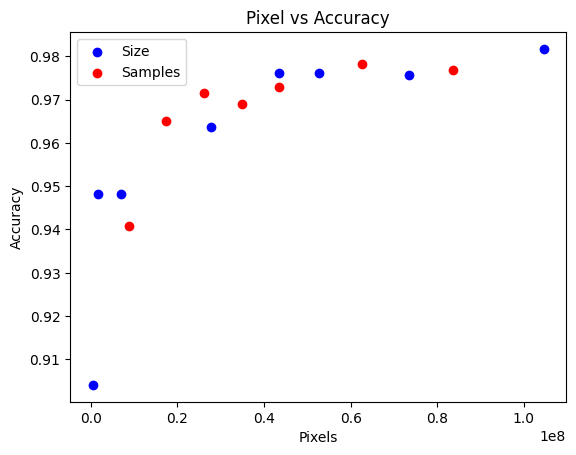

In [8]:
plotExperiment.Plot_Scatter_Plot(False) #By the way, the last boolean indicates whether or not to save the figure

## **Experiment 3**
For experiment 3, the same values can be found for the accuracy and loss using a single image as input and using multiple sections of a single image to create one total segmented image in the two following files:

results/Part3/overall_results_single/output.txt

results/Part3/overall_results_multiple/output.txt

Below, you'll find the python variables needed to create Figure 8(A) and 8(B). The values are read from the same files as above.

There are also lots of other results in the results folder. Feel free to take a look!

In [9]:
#Figure 8(A)
img_size = [32, 64, 128, 256, 320, 352, 416, 496] 
losses = [0.957786, 0.958651, 0.957724, 0.968612, 0.977927, 0.978722, 0.979273, 0.981197] 
title = 'Accuracy of models on large images when trained on smaller images' 
x_label = 'Image size used to train model' 
y_label = 'Accuracy'
#plotExperiment.Simple_Graph_Create(img_size, losses, title, x_label, y_label, False)

#Figure 8(B)
img_size = [32, 64, 128, 256, 320, 352, 416, 496] 
losses = [0.955880, 0.958846, 0.957834, 0.968581, 0.977910, 0.978613, 0.979240, 0.981272] 
title = 'Accuracy of models on large images when trained on smaller images' 
x_label = 'Image size used to train model' 
y_label = 'Accuracy'
#plotExperiment.Simple_Graph_Create(img_size, losses, title, x_label, y_label, False)

# **Training**
All the training was done in the train.py file.
We don't go into detail into how it works, but it consists of a lot of functions to load data, perform cropping augmentations and calculate loss.
It will also automatically use any available CUDA device, if any are present. Otherwise it will use the CPU.

State the different constant used to setup the training loop below.

new IMAGE HEIGHT: 32
new IMAGE WIDTH: 32
new MAX EPOCHS: 10
new NUM SAMPLES: -1
Device Used: cuda:0
Epoch 1/1
----------
LR 0.0001
train: cce: 0.871417, dice: 0.722424, loss: 0.796921, pixelAcc: 0.090695
val: cce: 0.498724, dice: 0.604520, loss: 0.551622, pixelAcc: 0.493589
saving best model
0m 4s
Best val loss: 0.551622
Best accuracy: 0.493589


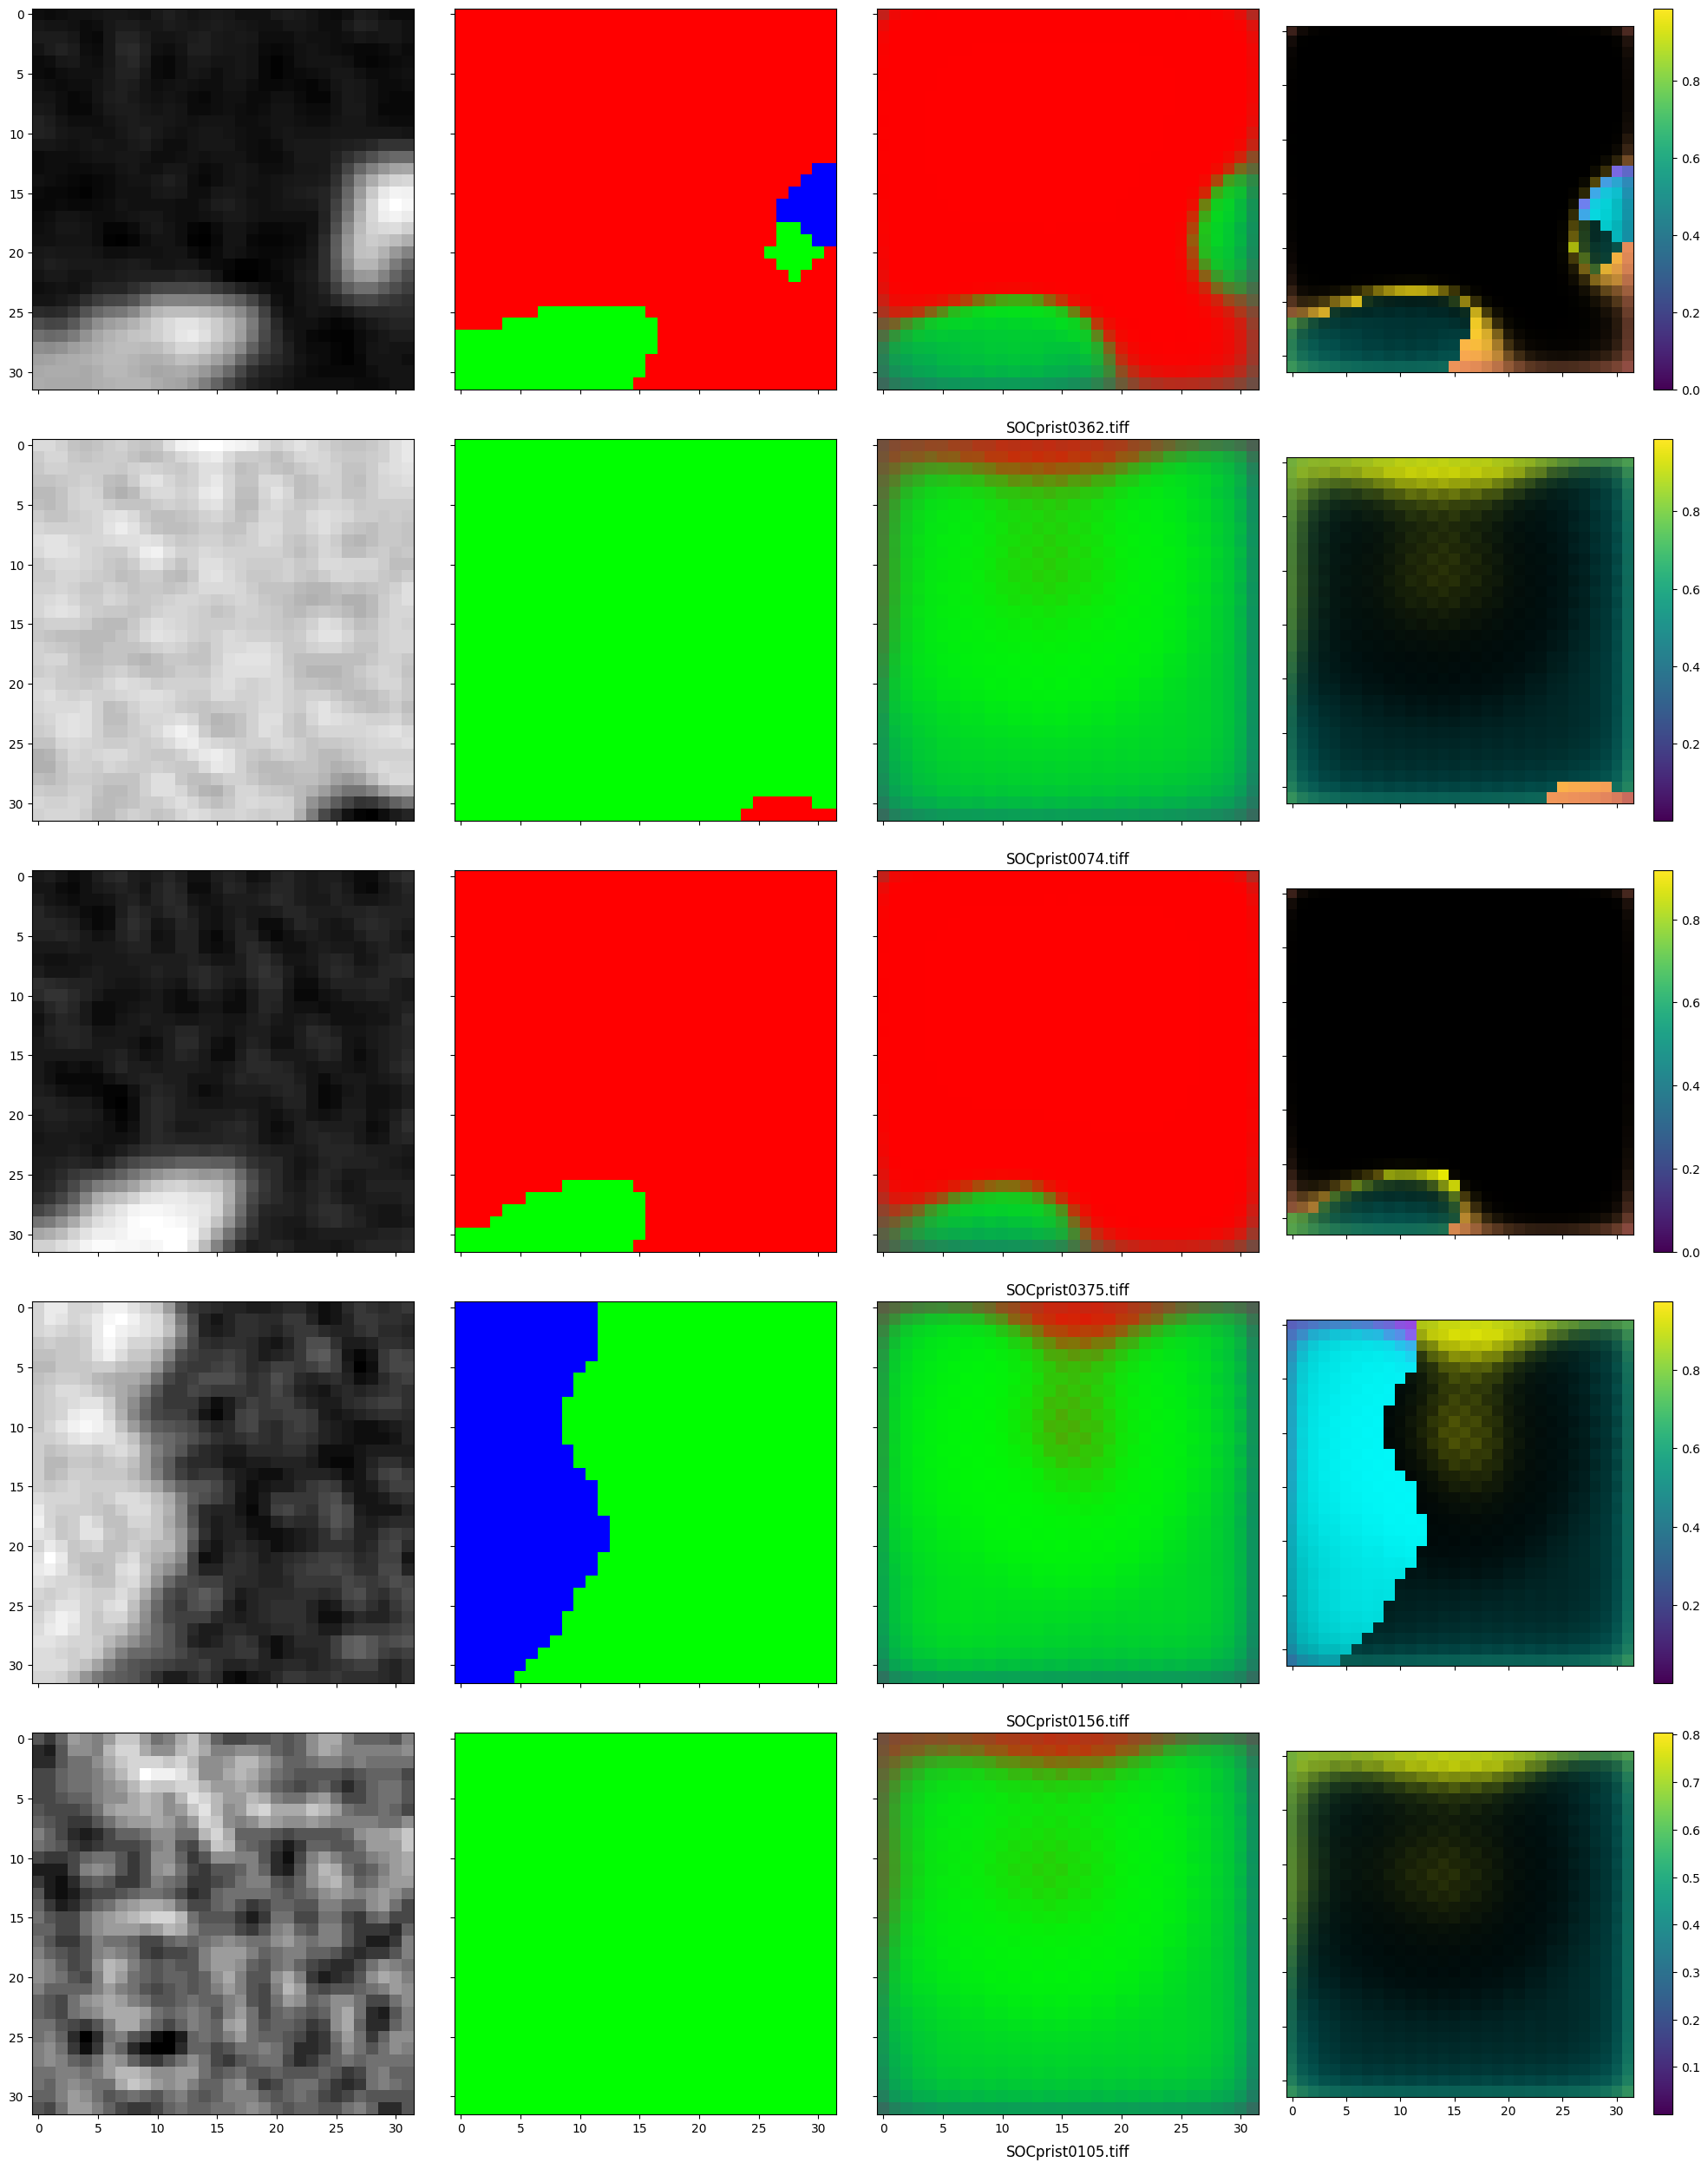

In [4]:
import Unet
import train

train.batch_size = 5
train.IMG_HEIGHT = 32
train.IMG_WIDTH = 32
train.EPOCHS = 10


train.run(Unet.UNet)